In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2
from shutil import copyfile

In [3]:
image_dir = Path('/content/Braille Dataset2')

In [4]:
dir_list = list(image_dir.glob('*.jpg')) 

In [5]:
image_count = len(dir_list)
image_count

1560

In [6]:
name_list = []

for i in dir_list:
    name_list.append(os.path.basename(i)[0])
# getting names of folder

In [7]:
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)
# converting to rgb 3d matrix

In [8]:
images_list = np.array(images)
name_list = np.array(name_list).T
#using numpy and converting to array

In [9]:
le = LabelEncoder()
name_list = le.fit_transform(name_list)

#covert image to 0 to 255 (pixel information)
images_list = images_list / 255.0 
print(images_list[1])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.98823529 0.98823529 0.98823529]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]]

 [[0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


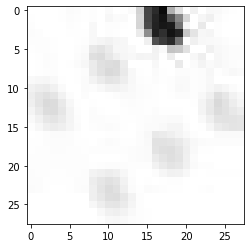

In [10]:
plt.imshow(images_list[1])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") #output layer
])


In [13]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])


In [14]:
from keras.callbacks import EarlyStopping

In [15]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])


Epoch 1/100
28/28 [==============================] - 11s 219ms/step - loss: 3.2610 - sparse_categorical_accuracy: 0.0332 - val_loss: 3.2415 - val_sparse_categorical_accuracy: 0.0320
Epoch 2/100
28/28 [==============================] - 5s 180ms/step - loss: 2.6234 - sparse_categorical_accuracy: 0.2440 - val_loss: 1.8542 - val_sparse_categorical_accuracy: 0.4747
Epoch 3/100
28/28 [==============================] - 5s 181ms/step - loss: 1.4500 - sparse_categorical_accuracy: 0.6048 - val_loss: 1.1151 - val_sparse_categorical_accuracy: 0.6933
Epoch 4/100
28/28 [==============================] - 5s 176ms/step - loss: 0.8476 - sparse_categorical_accuracy: 0.7342 - val_loss: 0.9632 - val_sparse_categorical_accuracy: 0.7173
Epoch 5/100
28/28 [==============================] - 5s 182ms/step - loss: 0.5007 - sparse_categorical_accuracy: 0.8534 - val_loss: 0.8789 - val_sparse_categorical_accuracy: 0.7813
Epoch 6/100
28/28 [==============================] - 5s 172ms/step - loss: 0.3155 - sparse_cat

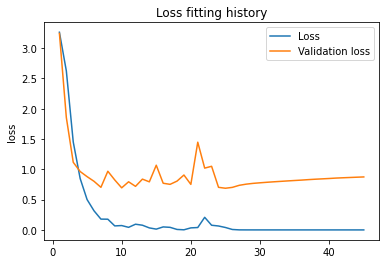

In [16]:
time = np.arange(1, len(history.history['loss'])+1)
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])

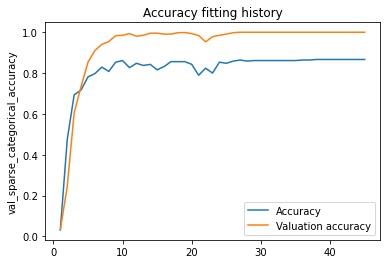

In [17]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])

In [18]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 52ms/step - loss: 0.7870 - sparse_categorical_accuracy: 0.8878


[0.7869830131530762, 0.8878205418586731]

[[[ 69.  69.  69.]
  [ 85.  85.  85.]
  [104. 104. 104.]
  ...
  [106. 106. 106.]
  [107. 107. 107.]
  [ 51.  51.  51.]]

 [[ 86.  86.  86.]
  [199. 199. 199.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [241. 241. 241.]
  [126. 126. 126.]]

 [[ 87.  87.  87.]
  [204. 204. 204.]
  [253. 253. 253.]
  ...
  [255. 255. 255.]
  [251. 251. 251.]
  [113. 113. 113.]]

 ...

 [[ 86.  86.  86.]
  [209. 209. 209.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [249. 249. 249.]
  [120. 120. 120.]]

 [[ 82.  82.  82.]
  [204. 204. 204.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [248. 248. 248.]
  [128. 128. 128.]]

 [[ 74.  74.  74.]
  [130. 130. 130.]
  [162. 162. 162.]
  ...
  [156. 156. 156.]
  [160. 160. 160.]
  [ 64.  64.  64.]]]
(28, 28, 3)
1/1 [==============================] - 0s 59ms/step
[16]


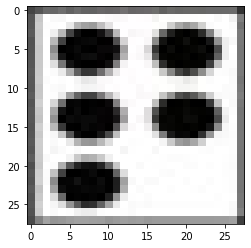

In [23]:
from tensorflow.keras.preprocessing import image
img=image.load_img('content/q.jpg',target_size=(28, 28,3))
plt.imshow(img)

x=image.img_to_array(img)
print(x)

print(x.shape)

x=np.expand_dims(x,axis=0)
prediciton=model.predict(x)
a=np.argmax(prediciton, axis=1)
print(a)

In [24]:
if a==[0]:
  print('a')
elif a==[1]:
  print('b')
elif a==[2]:
  print('c')
elif a==[3]:
  print('d') 
elif a==[4]:
  print('e')
elif a==[5]:
  print('f')
elif a==[6]:
  print('g')
elif a==[7]:
  print('h')
elif a==[8]:
  print('i')
elif a==[9]:
  print('j')
elif a==[10]:
  print('k')
elif a==[11]:
  print('l')
elif a==[12]:
  print('m')
elif a==[13]:
  print('n')
elif a==[14]:
  print('o')
elif a==[15]:
  print('p')
elif a==[16]:
  print('q')
elif a==[17]:
  print('r')
elif a==[18]:
  print('s')
elif a==[19]:
  print('t')
elif a==[20]:
  print('u')
elif a==[21]:
  print('v')
elif a==[22]:
  print('w')
elif a==[23]:
  print('x')
elif a==[24]:
  print('y')
elif a==[25]:
  print('z')

q


In [21]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# keras_file="Model.h5"
# tf.keras.models.save_model(model,keras_file)